In [2]:
'''
    BIRCH clustering is a hierarchial clustering algorithm
    designed for large-scale datasets
'''

'\n    BIRCH clustering is a hierarchial clustering algorithm\n    designed for large-scale datasets\n'

In [3]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
import seaborn as sns



In [4]:
# prepare data for clustering
df = pd.read_csv("data/pbd_outliers_removed.csv")
#cols = [
#    "video_pause_4",
#    "video_play_4",
#    "video_watch_4",
#    "video_completed_4"
#]

cols = [
 "video_pause_1",
 "video_completed_1",
 "video_pause_4",
 "video_play_1",
 "video_watch_2",
 "video_watch_3",
 "video_seek_3",
 "video_play_2",
 "video_seek_4",
 "video_watch_1",
 "video_completed_2",
 "video_pause_2",
 "video_play_4",
 "video_play_3",
 "video_pause_3",
 "video_seek_1",
 "video_watch_4",
 "video_seek_2",
 "video_caption_1",
 "video_completed_3",
 "video_caption_2",
 "video_completed_4"
]


trimmed_df = df[cols]
#scores = df["ALG1_EOC_SCALE_SCORE_22"]

trimmed_df


,video_pause_1,video_completed_1,video_pause_4,video_play_1,video_watch_2,video_watch_3,video_seek_3,video_play_2,video_seek_4,video_watch_1,...,video_play_4,video_play_3,video_pause_3,video_seek_1,video_watch_4,video_seek_2,video_caption_1,video_completed_3,video_caption_2,video_completed_4
0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,7.0,1.0,5.0,...,1.0,2.0,1.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,10.0,5.0,0.0,0.0,6.0,0.0,4.0,...,0.0,0.0,0.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,10.0,2.0,1.0,9.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
17908,0.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,...,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
17909,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17910,0.0,0.0,0.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,...,0.0,5.0,4.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0


In [5]:
# scales data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(trimmed_df), columns=trimmed_df.columns)

df_scaled


,video_pause_1,video_completed_1,video_pause_4,video_play_1,video_watch_2,video_watch_3,video_seek_3,video_play_2,video_seek_4,video_watch_1,...,video_play_4,video_play_3,video_pause_3,video_seek_1,video_watch_4,video_seek_2,video_caption_1,video_completed_3,video_caption_2,video_completed_4
0,-0.395875,0.037324,-0.235402,-0.242290,-0.106130,-0.452218,-0.200839,0.229661,-0.201098,-0.306070,...,-0.392386,-0.211992,-0.247496,0.261758,-0.402636,0.099940,-0.479943,-0.490929,-0.392215,-0.480737
1,-0.745800,-0.609889,-0.546886,-0.760437,-0.692484,-0.613318,-0.584431,-0.688209,-0.539707,-0.779847,...,-0.573796,-0.628478,-0.600217,-0.718436,-0.574809,-0.638861,-0.479943,-0.490929,-0.392215,-0.480737
2,0.129013,-0.609889,-0.546886,0.275857,-0.106130,-0.613318,-0.584431,0.098536,-0.539707,-0.400825,...,-0.573796,-0.628478,-0.600217,0.261758,-0.574809,0.099940,0.790955,-0.490929,-0.392215,-0.480737
3,-0.745800,-0.609889,-0.546886,-0.760437,0.480223,-0.291119,-0.200839,0.491909,-0.539707,-0.779847,...,-0.573796,-0.420235,-0.247496,-0.718436,-0.574809,0.592473,-0.479943,0.129635,-0.392215,-0.480737
4,-0.745800,-0.609889,-0.546886,-0.760437,-0.457943,-0.613318,-0.584431,-0.163712,-0.539707,-0.779847,...,-0.573796,-0.628478,-0.600217,-0.718436,-0.574809,-0.146327,-0.479943,-0.490929,-0.392215,-0.480737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,-0.745800,-0.609889,-0.546886,-0.760437,-0.692484,-0.130019,-0.200839,-0.688209,-0.539707,-0.779847,...,-0.573796,-0.420235,-0.247496,-0.718436,-0.230462,-0.638861,-0.479943,-0.490929,-0.392215,-0.480737
17908,-0.745800,-0.609889,0.076082,-0.760437,-0.692484,0.353280,-0.200839,-0.688209,-0.539707,-0.779847,...,-0.210975,-0.003748,0.105225,-0.718436,-0.402636,-0.638861,-0.479943,0.129635,-0.392215,-0.480737
17909,-0.745800,-0.609889,-0.235402,-0.760437,-0.457943,-0.613318,-0.584431,-0.557084,-0.201098,-0.779847,...,-0.392386,-0.628478,-0.600217,-0.718436,-0.488723,-0.638861,-0.479943,-0.490929,-0.392215,-0.480737
17910,-0.745800,-0.609889,-0.546886,-0.760437,-0.692484,0.997679,0.949935,-0.688209,-0.539707,-0.779847,...,-0.573796,0.412739,0.810666,-0.718436,NaN,-0.638861,-0.479943,0.750199,-0.392215,-0.480737


In [6]:
# remove NaN
# this imputer completes missing values with the mean
imputer = SimpleImputer(strategy="mean")
df_scaled = imputer.fit_transform(df_scaled)

In [7]:
# dimensionality scaling
'''
    Visualizes high-dimensional data by giving each data point a location
    in a two or three-dimensional map. 
'''
# synthetic data for testing
#df_scaled, _ = make_blobs(n_samples=1000, centers=100, random_state=0)

tsne = TSNE(n_components=2, random_state = 0)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled), columns=["TSNE1", "TSNE2"])

/tmp/ipykernel_17793/1941322919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')
/tmp/ipykernel_17793/1941322919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')
/tmp/ipykernel_17793/1941322919.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataF

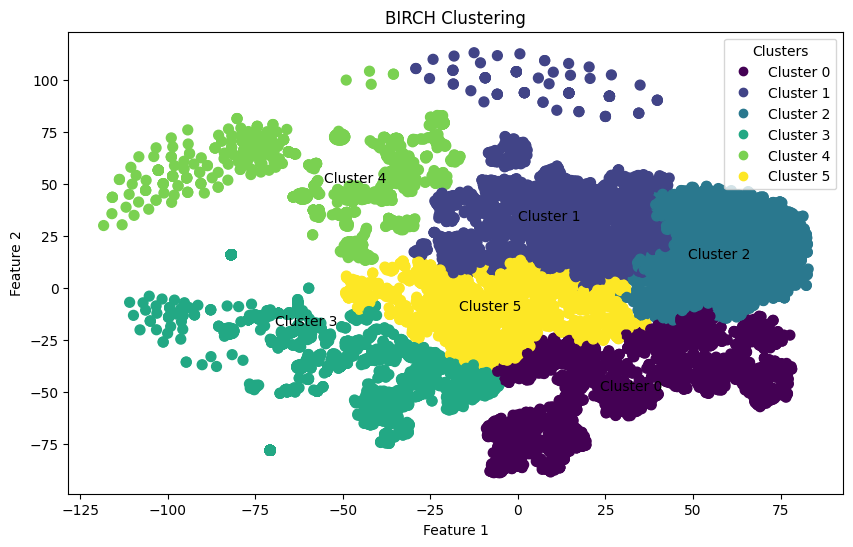

In [8]:
brc = Birch(n_clusters=6)
brc.fit(df_tsne)
labels = brc.predict(df_tsne)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=labels, cmap='viridis', marker='o', s=50)

# Annotate clusters with labels
for cluster_label in np.unique(labels):
    cluster_mean = np.mean(df_tsne.loc[labels == cluster_label, ['TSNE1', 'TSNE2']], axis=0)
    plt.text(cluster_mean[0], cluster_mean[1], f'Cluster {cluster_label}', fontsize=10, ha='center', va='center', color='black')

# Plot details
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend
legend_labels = [f'Cluster {cluster_label}' for cluster_label in np.unique(labels)]
plt.legend(handles=scatter.legend_elements()[0], title="Clusters", labels=legend_labels)

plt.show()

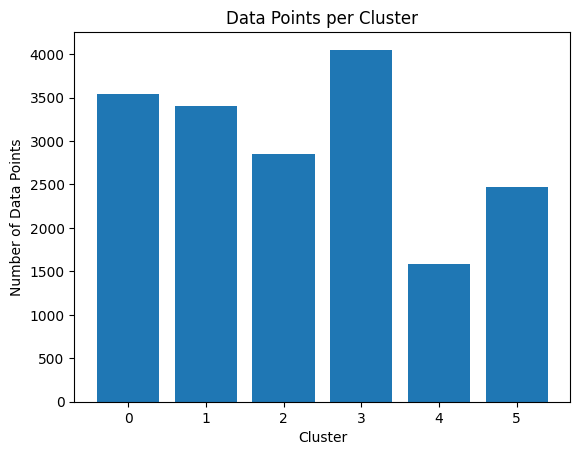

In [9]:
df_tsne['cluster'] = labels
cluster_counts = df_tsne['cluster'].value_counts().sort_index()

# Plotting
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Cluster')
plt.show()

In [10]:

# Add cluster labels to the original dataframe
df['cluster'] = labels


In [11]:

# Calculate the mean of each action within each cluster
action_means_by_cluster = df.groupby('cluster')[cols].mean()

# Identify the action with the highest mean in each cluster
highest_actions_by_cluster = action_means_by_cluster.idxmax(axis=1)

# Display the result
print("Action with the highest mean in each cluster:")
print(highest_actions_by_cluster)


Action with the highest mean in each cluster:
cluster
0    video_watch_1
1    video_watch_4
2    video_watch_1
3    video_watch_1
4    video_watch_4
5    video_watch_1
dtype: object


In [12]:

# Assuming 'labels' contains the cluster assignments

# Add cluster labels to the original dataframe
df['cluster'] = labels


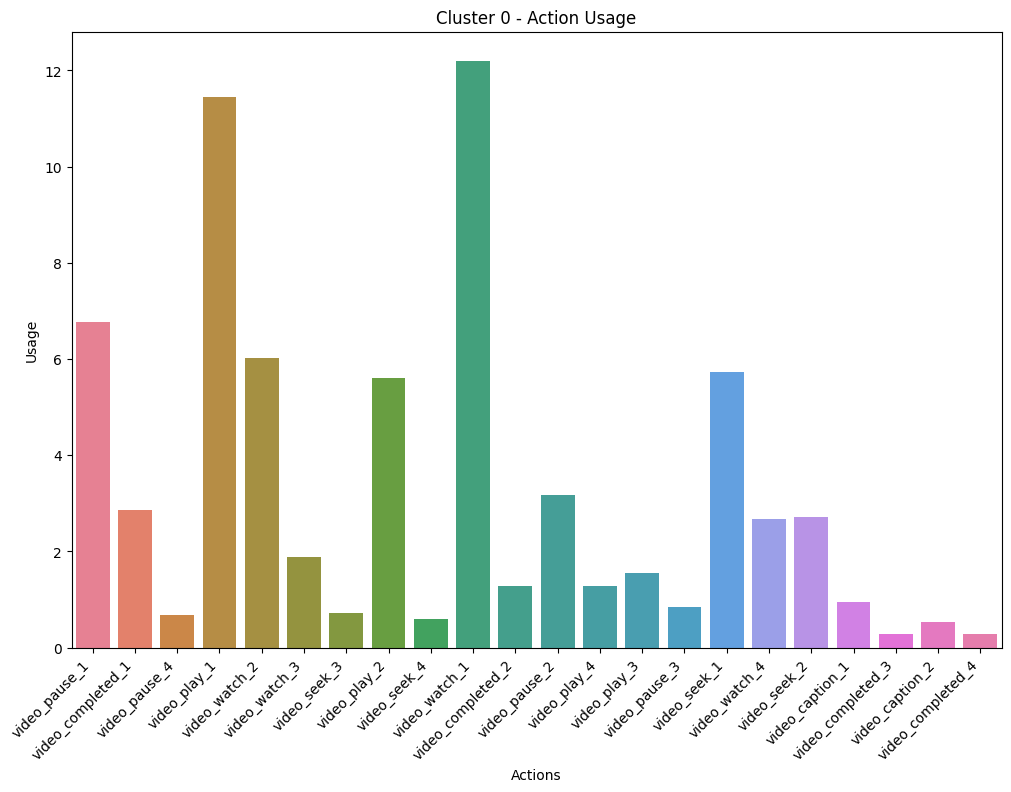

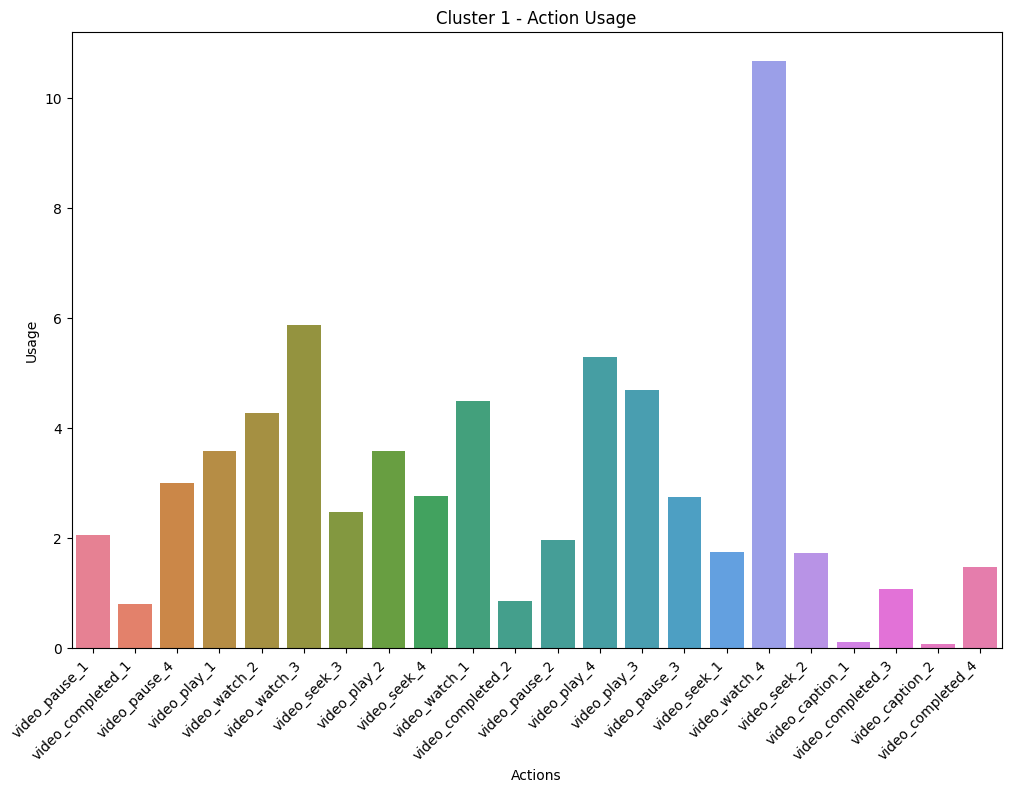

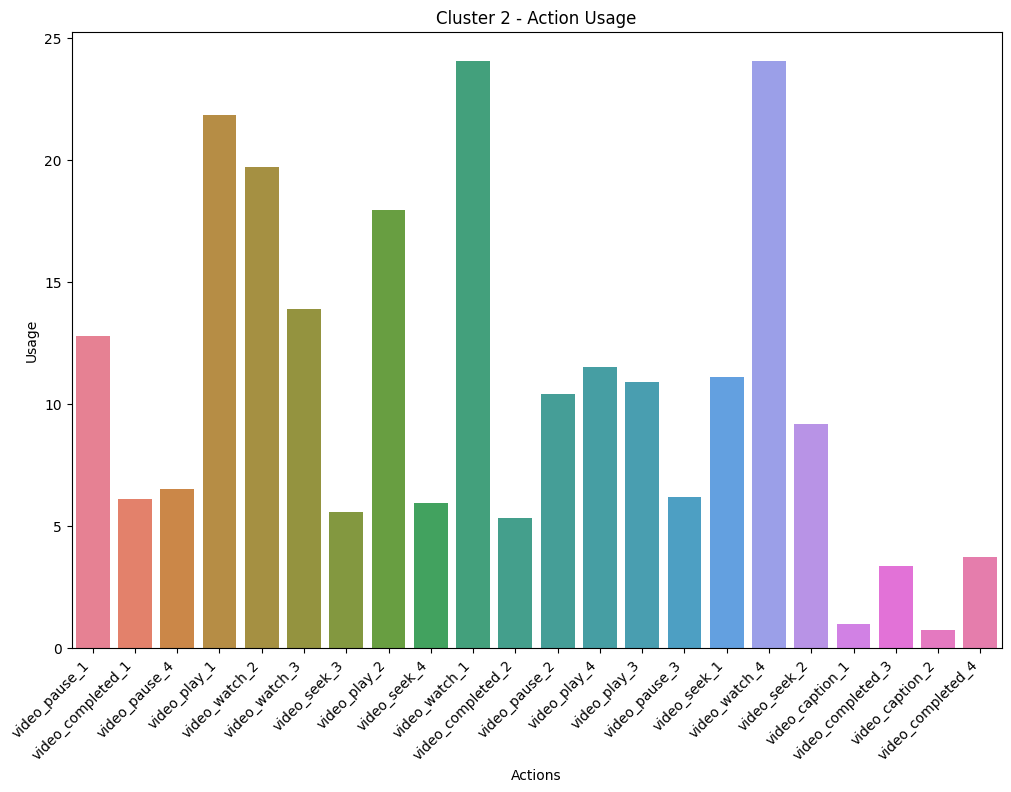

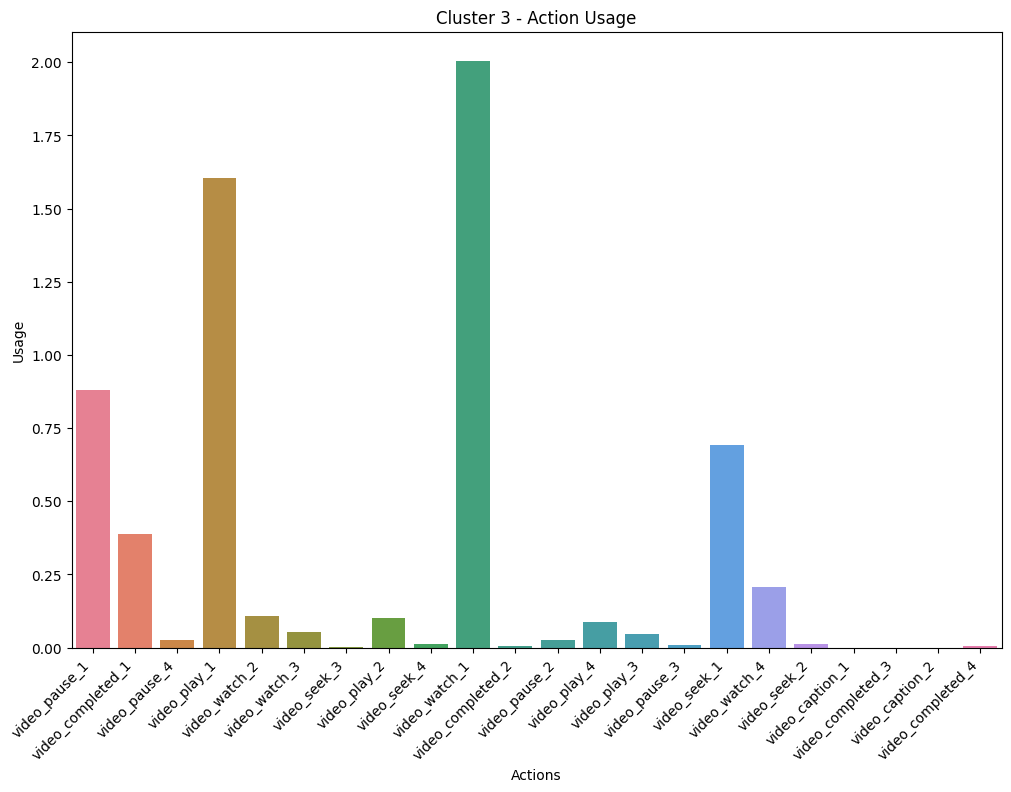

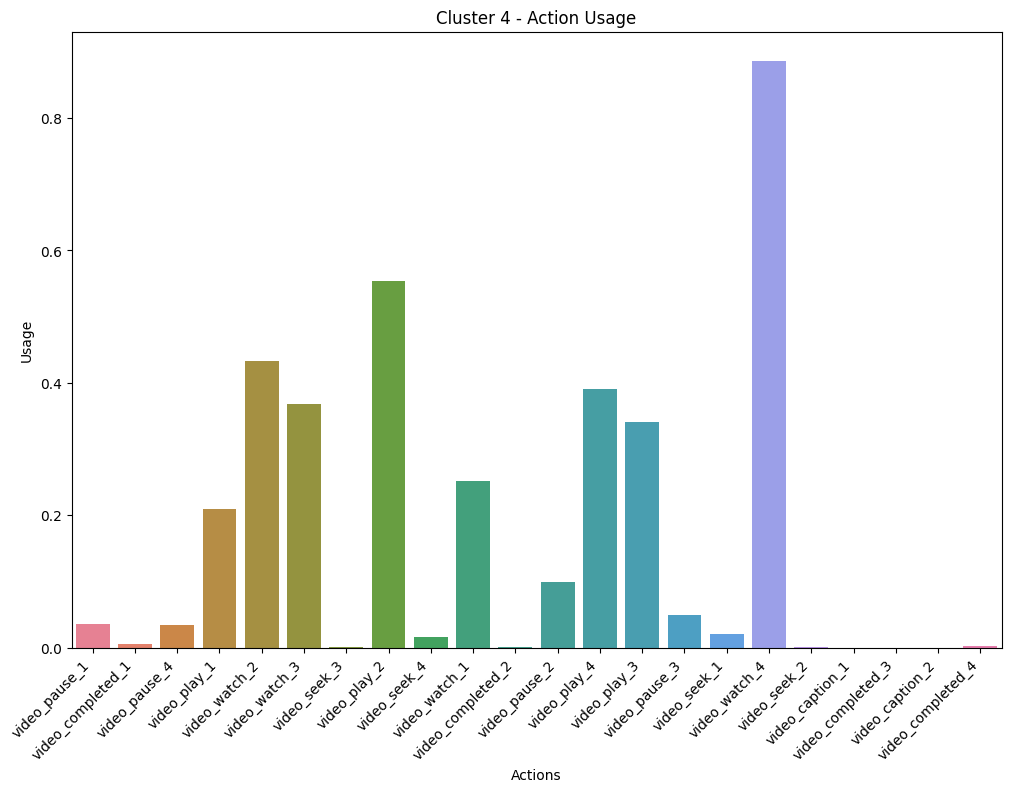

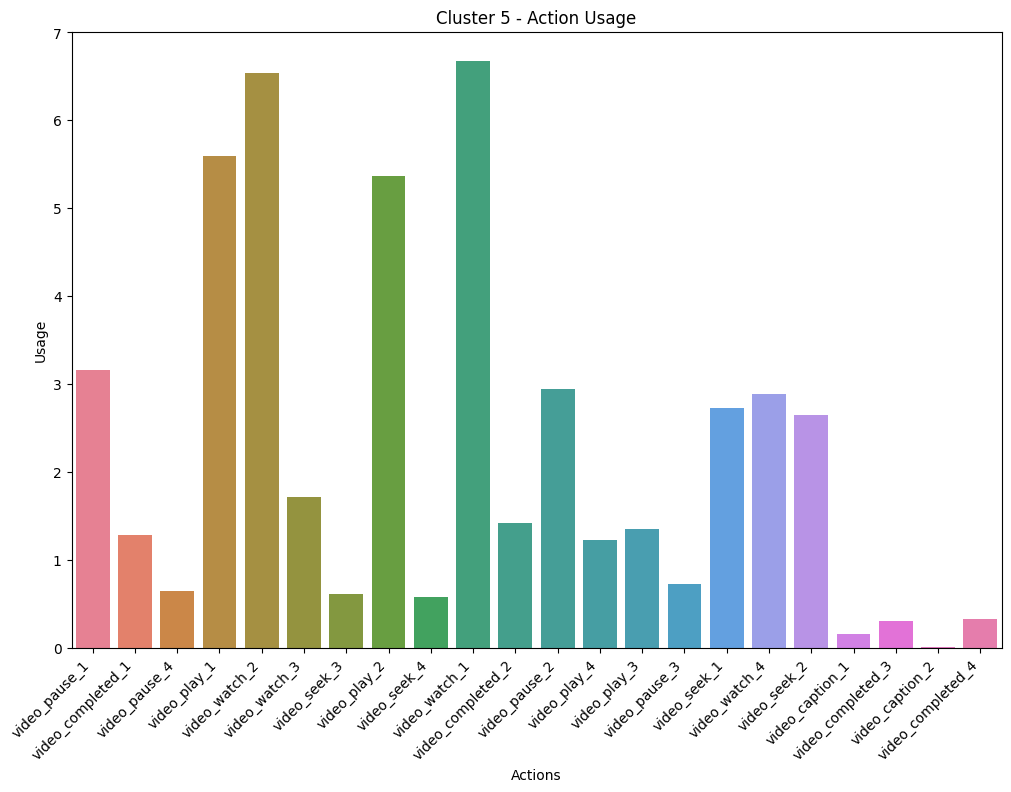

In [13]:
# Plot separate graphs for each cluster
for cluster_num in range(6):  # Assuming 6 clusters
    cluster_data = df[df['cluster'] == cluster_num][cols]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=cluster_data, errorbar=None)
    plt.title(f'Cluster {cluster_num} - Action Usage')
    plt.xlabel('Actions')
    plt.ylabel('Usage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()